# General function 

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def compute_and_plot_derivative_errors(f, f_prime_exact, x, n_min=1, n_max=21, label=None):
    n_values = np.arange(n_min, n_max + 1)
    h_values = 2 / (2**n_values)
    
    exact_derivative = f_prime_exact(x)
    
    error_method1 = []
    error_method2 = []
    error_method3 = []
    error_method4 = []
    error_method5 = []
    
    for h in h_values:
        method1 = (f(x + h) - f(x)) / h
        error1 = abs(method1 - exact_derivative)
        error_method1.append(error1)
        
        method2 = (f(x) - f(x - h)) / h
        error2 = abs(method2 - exact_derivative)
        error_method2.append(error2)
        
        method3 = (f(x + h) - f(x - h)) / (2 * h)
        error3 = abs(method3 - exact_derivative)
        error_method3.append(error3)
        
        term1 = 4 * (f(x + h) - f(x - h)) / (3 * 2 * h)
        term2 = (f(x + 2*h) - f(x - 2*h)) / (3 * 4 * h)
        method4 = term1 - term2
        error4 = abs(method4 - exact_derivative)
        error_method4.append(error4)
        
        term1_m5 = 3 * (f(x + h) - f(x - h)) / (2 * 2 * h)
        term2_m5 = 3 * (f(x + 2*h) - f(x - 2*h)) / (5 * 4 * h)
        term3_m5 = (f(x + 3*h) - f(x - 3*h)) / (10 * 6 * h)
        method5 = term1_m5 - term2_m5 + term3_m5
        error5 = abs(method5 - exact_derivative)
        error_method5.append(error5)
    
    # Преобразование списков погрешностей в массивы для удобства
    error_method1 = np.array(error_method1)
    error_method2 = np.array(error_method2)
    error_method3 = np.array(error_method3)
    error_method4 = np.array(error_method4)
    error_method5 = np.array(error_method5)
    
    # Построение графиков
    plt.loglog(h_values, error_method1, 'o-', label='Метод 1: Прямой разностный')
    plt.loglog(h_values, error_method2, 's-', label='Метод 2: Обратный разностный')
    plt.loglog(h_values, error_method3, '^-', label='Метод 3: Центральный разностный')
    plt.loglog(h_values, error_method4, 'd-', label='Метод 4')
    plt.loglog(h_values, error_method5, 'x-', label='Метод 5')
    
    # Настройка графика
    if label:
        plt.title(f'Абсолютная погрешность в лог. шкале методов для {label}', fontsize=14)
    else:
        plt.title('Абсолютная погрешность в лог. шкале ', fontsize=14)
    plt.xlabel('Шаг h', fontsize=12)
    plt.ylabel('Абсолютная погрешность', fontsize=12)
    plt.legend()
    plt.grid(True, which="both", ls="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()

# sin(x**2)

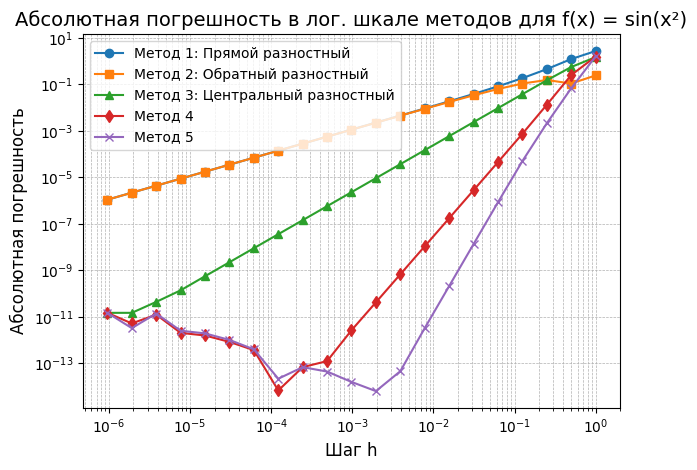

In [11]:
def func(x):
    return np.sin(x**2)

def func_prime(x):
    return 2 * x * np.cos(x**2)

# Вычисляем и строим графики для каждой функции
compute_and_plot_derivative_errors(
    f=func,
    f_prime_exact=func_prime,
    x=1.0,
    n_min=1,
    n_max=21,
    label='f(x) = sin(x²)'
)

# cos(sin(x))

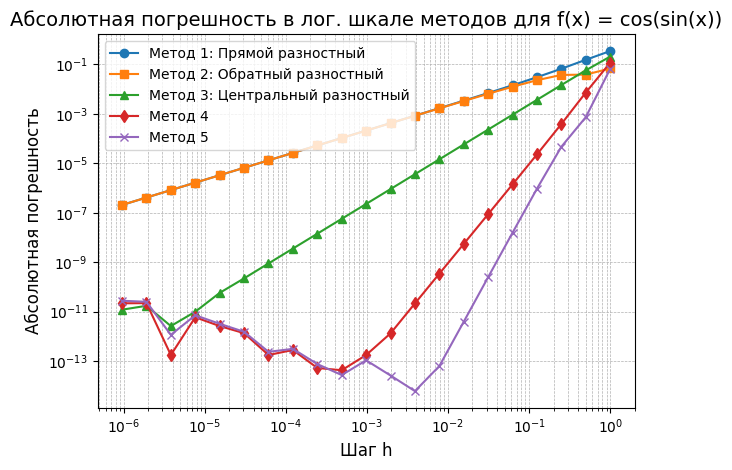

In [13]:
def func(x):
    return np.cos(np.sin(x))

def func_prime(x):
    return -np.sin(np.sin(x))*np.cos(x)

# Вычисляем и строим графики для каждой функции
compute_and_plot_derivative_errors(
    f=func,
    f_prime_exact=func_prime,
    x=1.0,
    n_min=1,
    n_max=21,
    label='f(x) = cos(sin(x))'
)

# exp(sin(cos(x)))

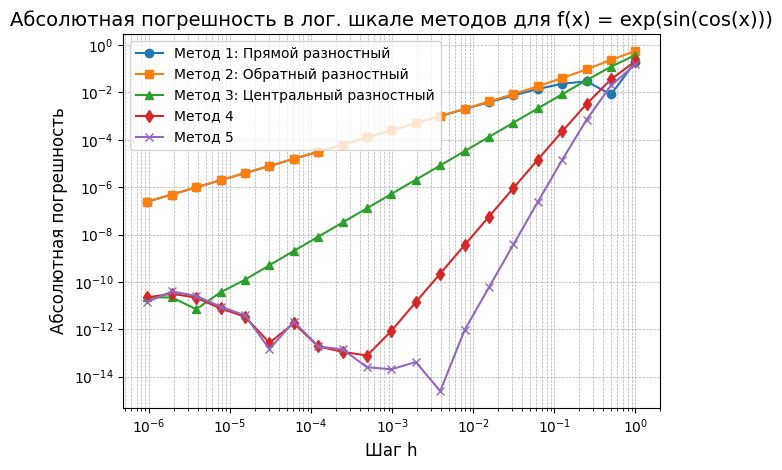

In [17]:
def func(x):
    return np.exp(np.sin(np.cos(x)))

def func_prime(x):
    return -np.cos(np.cos(x)) * np.sin(x) * np.exp(np.sin(np.cos(x)))

# Вычисляем и строим графики для каждой функции
compute_and_plot_derivative_errors(
    f=func,
    f_prime_exact=func_prime,
    x=1.0,
    n_min=1,
    n_max=21,
    label='f(x) = exp(sin(cos(x)))'
)

# ln(x+3)

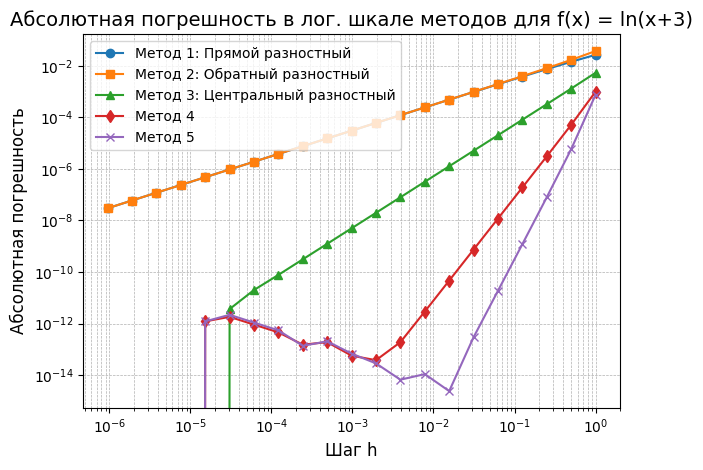

In [20]:
def func(x):
    return np.log(x+3)

def func_prime(x):
    return 1 / (x + 3) 

compute_and_plot_derivative_errors(
    f=func,
    f_prime_exact=func_prime,
    x=1.0,
    n_min=1,
    n_max=21,
    label='f(x) = ln(x+3)'
)

# (x+3)**0.5

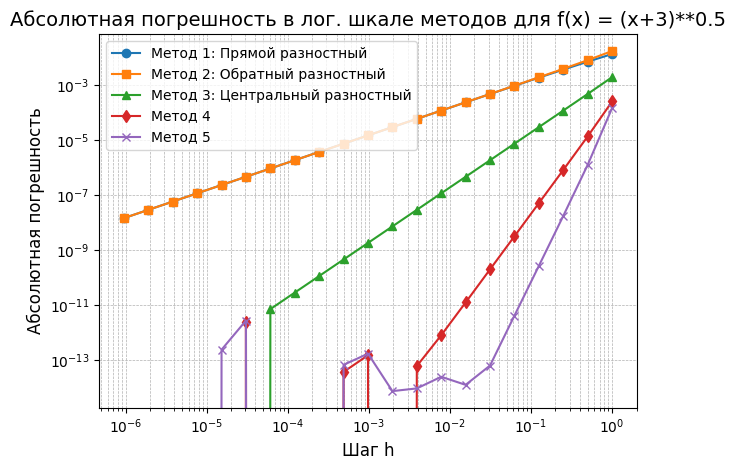

In [22]:
def func(x):
    return np.sqrt(x+3)

def func_prime(x):
    return 1 / (2*np.sqrt(x+3))

compute_and_plot_derivative_errors(
    f=func,
    f_prime_exact=func_prime,
    x=1.0,
    n_min=1,
    n_max=21,
    label='f(x) = (x+3)**0.5'
)